<a href="https://colab.research.google.com/github/gerardass/Capstone-final-project/blob/main/Heart_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing librairies**

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score

## **Loading the dataset**

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **Data Exploration**

In [4]:
df.shape

(918, 12)

In [5]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

We can observe that we have 2 categorical features: <code>Sex</code> and <code>ChestPainType</code>. While all the rest are numerical. Finally the target value is also a categroical type as it takes his values in 0 and 1 only.



In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No missing values! Our dataset is clean and ready to use 

## **Data preprocessing**

In [7]:
#Extracting categorical and numerical features
categorical_features = [column for column in df.columns if df[column].dtype == 'object'] 
numerical_features = [column for column in df.columns if df[column].dtype != 'object' and column != 'HeartDisease']
df_num = df[numerical_features]

#Normalizing numerical features and encoding categorical ones
df_num = pd.DataFrame(StandardScaler().fit_transform(df_num), columns=numerical_features)
df_cat = pd.get_dummies(df[categorical_features])
df1 = pd.concat([df_num,df_cat], axis = 1)

#Defining target variable and features
X = df1
y = df['HeartDisease']
df1.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,0,1,0,0,1,0,0,1,0,1,0,0,0,1


## **Building models**

In [8]:
#Splitting the dataset and initalizing a Random Forest Classifier Model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
model = RandomForestClassifier(n_estimators= 100)

In [9]:
#Using GridSearchCV to find the best number of estimators
params = {'n_estimators': range(1,100)}
model_cv = GridSearchCV(model, param_grid= params, cv = 10)
model_cv.fit(X_train,y_train)
model_cv.best_params_

{'n_estimators': 92}

## **Model evaluation**

In [10]:
#Calculating the F1 score
y_pred = model_cv.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.8571428571428572


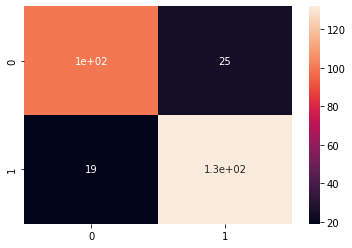

In [19]:
#Plot the confusion matrix
confusion  = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot = confusion )

In [20]:
#Gradient Boosting Classifier model
gbc= GradientBoostingClassifier(n_estimators=100)
gbc_cv = GridSearchCV(gbc, param_grid = params, cv = 10)
gbc_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [21]:
y_pred = gbc_cv.predict(X_test)
f1 = f1_score(y_test,y_pred)
print('F1 Score:', f1)

F1 Score: 0.8766233766233766


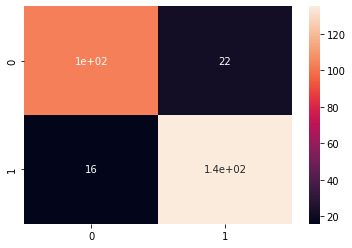

In [22]:
#Plot the confusion matrix
confusion  = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot = confusion )

In [28]:
#K-Nearest Neighbors Classifier model
knn= KNeighborsClassifier(n_neighbors=1)
params = {'n_neighbors': range(1,101)}
knn_cv = GridSearchCV(knn, param_grid = params, cv = 10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 101)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [30]:
y_pred = knn_cv.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1 Score:', f1)

F1 Score: 0.8664495114006514


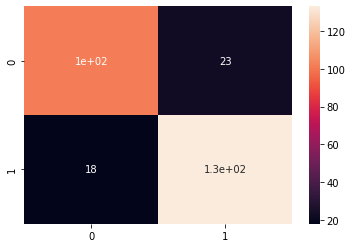

In [31]:
#Plot the confusion matrix
confusion  = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot = confusion )

## **Author: Assouala Gerard**
email : gerardassouala89@gmail.com